In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('payment_fraud.csv')
data.head(10)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
5,119,1,4.962055,paypal,0.000000,0
6,2000,1,4.921349,paypal,0.000000,0
7,371,1,4.876771,creditcard,0.000000,0
8,2000,1,4.748314,creditcard,0.000000,0
9,4,1,4.461622,creditcard,0.000000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


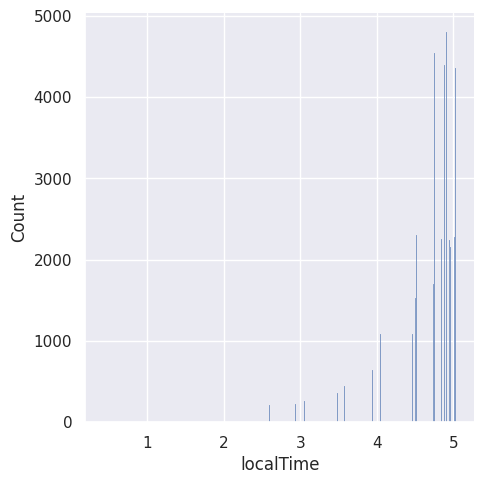

In [4]:
sns.displot(data['localTime'])

<Axes: xlabel='paymentMethod', ylabel='Count'>

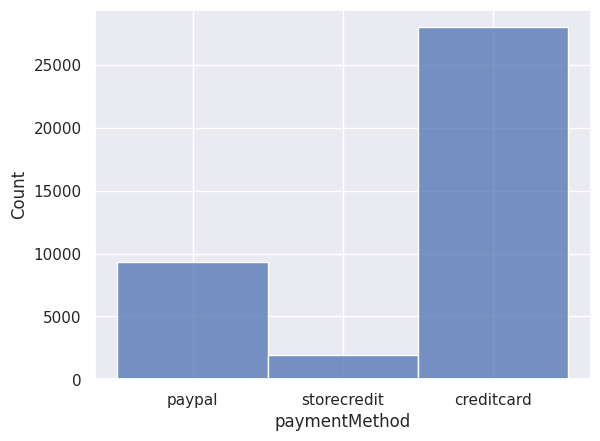

In [5]:
sns.histplot(data['paymentMethod'])

/tmp/ipykernel_204555/2325816609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['accountAgeDays'])


<Axes: xlabel='accountAgeDays', ylabel='Density'>

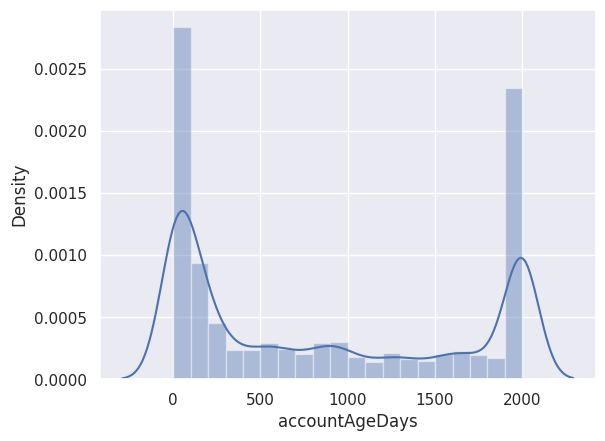

In [6]:
sns.distplot(data['accountAgeDays'])

In [7]:
int_data = data.drop('paymentMethod', axis=1)

In [8]:
# Dropping localtimes, thinking how big timeframe considering the localtime.
data_localtime = data.copy()
data_localtime.drop('localTime', axis=1, inplace=True)

In [9]:
data_localtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   paymentMethod         39221 non-null  object 
 3   paymentMethodAgeDays  39221 non-null  float64
 4   label                 39221 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
# Splitting data into X and Y
X = data_localtime.drop('label', axis=1)
Y = data_localtime['label']

In [12]:
data_localtime['paymentMethod'].unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

In [14]:
""" Make an Encoder to change the object-type column into a numeric"""

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [20]:
enc.fit(X[['paymentMethod']])

OrdinalEncoder()

In [24]:
X_encoder = enc.transform(X[['paymentMethod']])

In [27]:
# Concat
data_final = pd.concat([data_localtime, X_encoder])

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [11]:
# Change the each column into PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 5, svd_solver='full')
pca.fit(X)



ValueError: could not convert string to float: 'paypal'